In [23]:
import json
import requests
import pandas as pd
from k import api_key
import matplotlib.pyplot as plt
import csv
import numpy as np

In [24]:
cx = "000783178101923127511:vw462omy5uo"
url = "https://www.googleapis.com/customsearch/v1?"

total_results = []
months = []
hits11 = []
hits22 = []

for x in range(37, 0, -1):
    print(x)
    timeperiod1 = 'm' + str(x)
    parameters1 = {"q": "yodelling walmart boy",
              "cx": cx,
              "key": api_key,
              "dateRestrict": timeperiod1
              }
    timeperiod2 = 'm' + str(x+1)
    parameters2 = {"q": "yodelling walmart boy",
              "cx": cx,
              "key": api_key,
              "dateRestrict": timeperiod2
              }
    
    #time.sleep(2)
    page1 = requests.request("GET", url, params=parameters1)
    page2 = requests.request("GET", url, params=parameters2)
    
    results1 = json.loads(page1.text)
    results2 = json.loads(page2.text)
    
    #print(results)
    hits1 = results1["searchInformation"]["totalResults"]
    hits1 = int(hits1)
    hits2 = results2["searchInformation"]["totalResults"]
    hits2 = int(hits2)
    hits11.append(hits1)
    hits22.append(hits2)
    
    #print(hits)
    hits_permon = hits2 - hits1
    total_results.append(hits_permon)
    months.append("M" + str(x+1))

37
36
35
34
33
32
31
30
29
28
27
26
25
24
23
22
21
20
19
18
17
16
15
14
13
12
11
10
9
8
7
6
5
4
3
2
1


In [25]:
hits11

[421,
 421,
 420,
 418,
 418,
 416,
 414,
 414,
 414,
 411,
 410,
 410,
 408,
 405,
 402,
 402,
 398,
 392,
 392,
 390,
 389,
 385,
 385,
 378,
 371,
 342,
 343,
 317,
 226,
 208,
 208,
 192,
 182,
 184,
 184,
 161,
 146]

In [26]:
hits22

[421,
 421,
 421,
 420,
 418,
 418,
 416,
 414,
 414,
 414,
 411,
 410,
 410,
 408,
 405,
 402,
 402,
 398,
 392,
 392,
 390,
 389,
 385,
 385,
 378,
 371,
 342,
 343,
 317,
 226,
 208,
 208,
 192,
 182,
 184,
 184,
 161]

In [27]:
total_results

[0,
 0,
 1,
 2,
 0,
 2,
 2,
 0,
 0,
 3,
 1,
 0,
 2,
 3,
 3,
 0,
 4,
 6,
 0,
 2,
 1,
 4,
 0,
 7,
 7,
 29,
 -1,
 26,
 91,
 18,
 0,
 16,
 10,
 -2,
 0,
 23,
 15]

In [28]:
months

['M38',
 'M37',
 'M36',
 'M35',
 'M34',
 'M33',
 'M32',
 'M31',
 'M30',
 'M29',
 'M28',
 'M27',
 'M26',
 'M25',
 'M24',
 'M23',
 'M22',
 'M21',
 'M20',
 'M19',
 'M18',
 'M17',
 'M16',
 'M15',
 'M14',
 'M13',
 'M12',
 'M11',
 'M10',
 'M9',
 'M8',
 'M7',
 'M6',
 'M5',
 'M4',
 'M3',
 'M2']

In [33]:
mon_df = pd.DataFrame({
    "Months": months,
    "Results": total_results
    })
mon_df

,Months,Results
0,M38,0
1,M37,0
2,M36,1
3,M35,2
4,M34,0
5,M33,2
6,M32,2
7,M31,0
8,M30,0
9,M29,3


In [34]:
mon_df.to_csv('kermit_file1.csv', index = None, header=True)

<function matplotlib.pyplot.show(*args, **kw)>

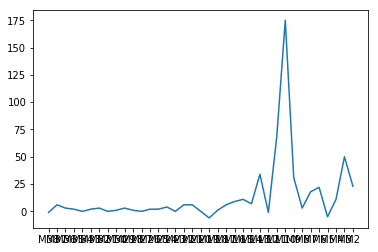

In [13]:
plt.plot(months, total_results)
plt.show

In [16]:
np.savetxt('memedata.csv', [p for p in zip(months, total_results)], delimiter=',', fmt='%s')